In [2]:
!pip install keras

Active code page: 65001
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [1]:
!pip install pySpark

Active code page: 65001
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/f4/65/41eb22b7b4623d9f4560526cc456cb6425770c098a9dff6763111c4455cc/pyspark-3.2.1.tar.gz (281.4 MB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/5e/e6/68db58a1d94d41ae042400f7965ed6a2c30e4108f77b54672d6451f86ebd/py4j-0.10.9.3-py2.py3-none-any.whl (198 kB)
  Created wheel for pySpark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=70e072f8ad860f4c5394fad1b71d189ad2e66a529ca98982a0c8a89e11883735
  Stored in directory: c:\users\xuyic\appdata\local\pip\cache\wheels\da\03\29\a8a543f8e8ba20f3985bd99abad8ba88e19caeecbdf06f393b
Successfully built pySpark


In [3]:
!pip install Tableau

Active code page: 65001
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/0a/81/8996109f1fab671f7867a8df878888bd85209d78e40aa2b795c96fb257a2/tableau-0.0.3.tar.gz (11 kB)
  Created wheel for Tableau: filename=tableau-0.0.3-py3-none-any.whl size=12616 sha256=4ac9b6b4bf3a75a6be32f063ec461d8513418d12e0e2918f5d685a17281bdc43
  Stored in directory: c:\users\xuyic\appdata\local\pip\cache\wheels\76\23\de\2dedb7726b6cd3f479945a91d66a0085a185ce920443c6e71f
Successfully built Tableau


In [3]:
import keras
import numpy
import sklearn
import pyspark
import tensorflow
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Q1 data choice
# Census-Income Database
# https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29

data = pd.read_csv('./agaricus-lepiota.data',sep=',')
data.columns = ['classes','cap-shape','cap-surface','cap-color','bruises?','odor','gill-attract','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
print(data.head)
print(data.shape)
print(data.columns)
print(data.describe())

<bound method NDFrame.head of      classes cap-shape cap-surface cap-color bruises? odor gill-attract  \
0          e         x           s         y        t    a            f   
1          e         b           s         w        t    l            f   
2          p         x           y         w        t    p            f   
3          e         x           s         g        f    n            f   
4          e         x           y         y        t    a            f   
...      ...       ...         ...       ...      ...  ...          ...   
8118       e         k           s         n        f    n            a   
8119       e         x           s         n        f    n            a   
8120       e         f           s         n        f    n            a   
8121       p         k           y         n        f    y            f   
8122       e         x           s         n        f    n            a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring 

In [ ]:
# Q2 data description

# From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible. extracted from the 1994 and 1995 Current Census Surveys conducted by the U.S. Census Bureau. The data contains 41 demographic and employment-related variables.
 
# Mushroom records taken from the Audubon Society Field Guide to North American Mushrooms

# The dataset includes descriptions of hypothetical samples corresponding to 23 species of spiny mushrooms in the Agaricus and Lepiota families

In [5]:
# Q3 initial analysis.

#  how many instances does the dataset contain
print("The dataset contains",len(data),"instances")

# how many attributes there are in the dataset
print("The dataset contains",len(data.columns),"attributes")

# decide if there is missing value
print("There are",data.isnull().sum().sum(),"missing values")

#  how many attributes there are in the dataset, their names, and include which is the class attribute.
for col in data.columns:
    print("The [",col,"]is",data[col].dtype)
    print("The dataset contains",data[col].value_counts(),"instances in each class")
    print("-----------------------------------------------------------------------------------")
    
# preprocess the data
processed_data = data.drop(['classes'],axis=1)

The dataset contains 8123 instances
The dataset contains 23 attributes
There are 0 missing values
The [ classes ]is object
The dataset contains e    4208
p    3915
Name: classes, dtype: int64 instances in each class
-----------------------------------------------------------------------------------
The [ cap-shape ]is object
The dataset contains x    3655
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 instances in each class
-----------------------------------------------------------------------------------
The [ cap-surface ]is object
The dataset contains y    3244
s    2555
f    2320
g       4
Name: cap-surface, dtype: int64 instances in each class
-----------------------------------------------------------------------------------
The [ cap-color ]is object
The dataset contains n    2283
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64 instances in each class
----------------------

In [8]:
# Q4 groupby analysis
# conducting groupby analysis
print("the cap-shape has "+str(processed_data['cap-shape'].nunique())+" unique values")

# list the unique value
print(processed_data['cap-shape'].unique())

# a list of the unique values
cap_shape_x=(processed_data['cap-shape']=='x')
cap_shape_b=(processed_data['cap-shape']=='b')
cap_shape_s=(processed_data['cap-shape']=='s')
cap_shape_f=(processed_data['cap-shape']=='f')
cap_shape_k=(processed_data['cap-shape']=='k')
cap_shape_c=(processed_data['cap-shape']=='c')

print("the cap-shape has "+str(cap_shape_x.sum())+" x")
print("the cap-shape has "+str(cap_shape_b.sum())+" b")
print("the cap-shape has "+str(cap_shape_s.sum())+" s")
print("the cap-shape has "+str(cap_shape_f.sum())+" f")
print("the cap-shape has "+str(cap_shape_k.sum())+" k")
print("the cap-shape has "+str(cap_shape_c.sum())+" c")

# groupby analysis
cap_shape_data=processed_data.groupby('cap-shape')
cap_shape_data.get_group('x')
cap_shape_data.get_group('x').shape

print(type(cap_shape_data))
print(type(cap_shape_data.get_group('x')))
print(len(cap_shape_data))
print(len(cap_shape_data.get_group('x')))


the cap-shape has 6 unique values
['x' 'b' 's' 'f' 'k' 'c']
the cap-shape has 3655 x
the cap-shape has 452 b
the cap-shape has 32 s
the cap-shape has 3152 f
the cap-shape has 828 k
the cap-shape has 4 c
pandas.core.groupby.generic.DataFrameGroupBy
<class 'pandas.core.frame.DataFrame'>
6
3655


<AxesSubplot:>

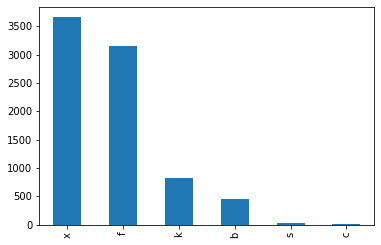

In [11]:
# Q5 data representation
processed_data['cap-shape'].value_counts().plot(kind='bar')

<AxesSubplot:>

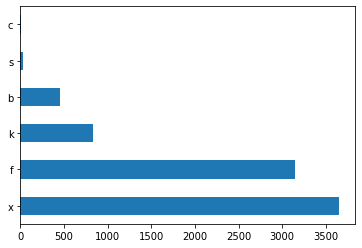

In [12]:
processed_data['cap-shape'].value_counts().plot(kind='barh')

<AxesSubplot:ylabel='cap-shape'>

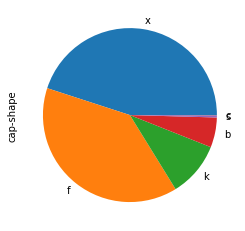

In [13]:
processed_data['cap-shape'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Frequency'>

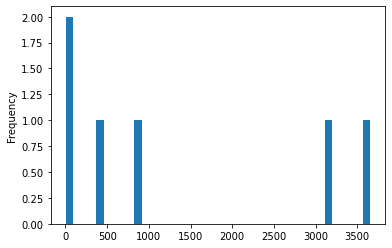

In [14]:
processed_data['cap-shape'].value_counts().plot(kind='hist',bins=40)

In [19]:
# Q7 Data mining
# split the data
from sklearn.model_selection import train_test_split
train_lr, test_lr = train_test_split(data, test_size=0.33)

# feature and target
data_features = ['cap-shape','cap-surface','cap-color','bruises?','odor','gill-attract','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
data_target = ['classes']

# ID3 algorithm
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

vec=DictVectorizer(sparse=False)
X_train=vec.fit_transform(train_lr[data_features].to_dict(orient='records'))
y_train=train_lr[data_target].values
X_test=vec.transform(test_lr[data_features].to_dict(orient='records'))
y_test=test_lr[data_target].values


dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)
y_pred = dtc_model.predict(X_test)
print("the accuracy of the model is: "+str(accuracy_score(y_test,y_pred)))

# cart algorithm
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
print("the accuracy of the model is: "+str(accuracy_score(y_test,y_pred)))

the accuracy of the model is: 1.0


C:\Users\xuyic\anaconda3\envs\tensorflow1.4\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


the accuracy of the model is: 1.0


In [ ]:
# Q8 Discussion of findings.
# Q9 Big Data Management.
# Q10 Report writing.
# on report